## 데이터 불러오기

In [23]:
import os

# 현재 작업 디렉토리를 가져옵니다.
current_directory = os.getcwd()

# 현재 작업 디렉토리를 출력합니다.
print(f'현재 작업 디렉토리: {current_directory}')


현재 작업 디렉토리: C:\Users\leeyh\Downloads


In [25]:
import os

# 변경할 디렉토리 경로를 지정합니다.
new_directory = r'C:\Users\leeyh\산업인공지능'

# 현재 작업 디렉토리를 변경합니다.
os.chdir(new_directory)

# 변경된 작업 디렉토리를 출력하여 확인합니다.
print(f'변경된 작업 디렉토리: {os.getcwd()}')


변경된 작업 디렉토리: C:\Users\leeyh\산업인공지능


import pandas as pd

df_train = pd.read_csv('train_data.csv')
df_valid = pd.read_csv('valid_data.csv')

In [47]:
# x_train, y_train 설정
x_train = df_train.iloc[:, [3, 4] + list(range(6, df_train.shape[1]))]
y_train = df_train.iloc[:, 5]

# x_valid, y_valid 설정
x_valid = df_valid.iloc[:, [3, 4] + list(range(6, df_valid.shape[1]))]
y_valid = df_valid.iloc[:, 5]

## 기본 작업

In [48]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

In [ ]:
## 레이블 인코딩 작업

In [49]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels with value between 0 and n_classes-1
# XGBClassifier를 사용하기 위해 대상 레이블을 정수로 인코딩해야 합니다.
# 현재 대상 레이블은 범주형 문자열이므로, LabelEncoder를 사용하여 숫자로 변환해야 합니다.

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_valid = label_encoder.transform(y_valid)

# got ['in' 'noise' 'normal' 'other' 'out']---> 클래스를 정수로 인코딩: [0 1 2 3 4]

In [16]:
#pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [50]:
# XGBoost 모델 설정(default)

params = {}

In [18]:
## DMatrix 생성

In [51]:
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dvalid = xgb.DMatrix(data=x_valid, label=y_valid)

In [61]:
num_rounds = 100
evals = [(dtrain, 'train'), (dvalid, 'valid')]  # 평가용 데이터 세트
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=evals, verbose_eval=True)

[0]	train-rmse:1.41659	valid-rmse:1.43143
[1]	train-rmse:1.37741	valid-rmse:1.39621
[2]	train-rmse:1.34572	valid-rmse:1.37034
[3]	train-rmse:1.32307	valid-rmse:1.35234
[4]	train-rmse:1.30880	valid-rmse:1.34072
[5]	train-rmse:1.29460	valid-rmse:1.33201
[6]	train-rmse:1.27681	valid-rmse:1.31675
[7]	train-rmse:1.26913	valid-rmse:1.31106
[8]	train-rmse:1.25691	valid-rmse:1.30093
[9]	train-rmse:1.24906	valid-rmse:1.29397
[10]	train-rmse:1.24070	valid-rmse:1.28671
[11]	train-rmse:1.22901	valid-rmse:1.27763
[12]	train-rmse:1.22221	valid-rmse:1.27235
[13]	train-rmse:1.20810	valid-rmse:1.26216
[14]	train-rmse:1.19495	valid-rmse:1.25136
[15]	train-rmse:1.18714	valid-rmse:1.24491
[16]	train-rmse:1.18322	valid-rmse:1.24074
[17]	train-rmse:1.17291	valid-rmse:1.23297
[18]	train-rmse:1.16402	valid-rmse:1.22510
[19]	train-rmse:1.15271	valid-rmse:1.21583
[20]	train-rmse:1.13655	valid-rmse:1.20317
[21]	train-rmse:1.13071	valid-rmse:1.19915
[22]	train-rmse:1.12099	valid-rmse:1.19323
[23]	train-rmse:1.114

## 모델 평가

In [ ]:
## 모델 예측(수정후)

In [62]:
y_pred_train = model.predict(dtrain)
y_pred_valid = model.predict(dvalid)

preds_train = np.asarray([np.argmax(line) for line in y_pred_train]) 
preds_valid = np.asarray([np.argmax(line) for line in y_pred_valid])

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_true, y_pred):
    confusion = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print("Confusion Matrix:")
    print(confusion)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# 학습 데이터와 벨리드 데이터 예측
y_pred_train = model.predict(dtrain)
y_pred_valid = model.predict(dvalid)

# 학습 데이터 평가
print("Training Data Evaluation:")
get_clf_eval(y_train, preds_train)

# 벨리드 데이터 평가
print("\nValidation Data Evaluation:")
get_clf_eval(y_valid, preds_valid)

Training Data Evaluation:
Confusion Matrix:
[[ 8523     0     0     0     0]
 [ 3222     0     0     0     0]
 [12619     0     0     0     0]
 [ 4491     0     0     0     0]
 [11185     0     0     0     0]]
Accuracy: 0.2129, Precision: 0.0453, Recall: 0.2129, F1-score: 0.0747

Validation Data Evaluation:
Confusion Matrix:
[[2716    0    0    0    0]
 [ 974    0    0    0    0]
 [3880    0    0    0    0]
 [1392    0    0    0    0]
 [3551    0    0    0    0]]
Accuracy: 0.2171, Precision: 0.0471, Recall: 0.2171, F1-score: 0.0774


C:\Users\leeyh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leeyh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#수정 전
#에러메시지: AxisError: axis 1 is out of bounds for array of dimension 1


#from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
#from sklearn.metrics import f1_score, roc_auc_score

#def get_clf_eval(y_true, y_pred):
#    confusion = confusion_matrix(y_true, y_pred)
#    accuracy = accuracy_score(y_true, y_pred)
#    precision = precision_score(y_true, y_pred, average='weighted')
#    recall = recall_score(y_true, y_pred, average='weighted')
#    f1 = f1_score(y_true, y_pred, average='weighted')

#    print("Confusion Matrix:")
#    print(confusion)
#    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# 학습 데이터와 테스트 데이터 예측
#y_pred_train = model.predict(dtrain)
#y_pred_test = model.predict(dtest)

# 학습 데이터 평가
#print("Training Data Evaluation:")
#get_clf_eval(y_train, np.argmax(y_pred_train, axis=1))

# 테스트 데이터 평가
#print("\nTest Data Evaluation:")
#get_clf_eval(y_test, np.argmax(y_pred_test, axis=1))

## Feature importance 계산

In [ ]:
## 전제 Feature importance

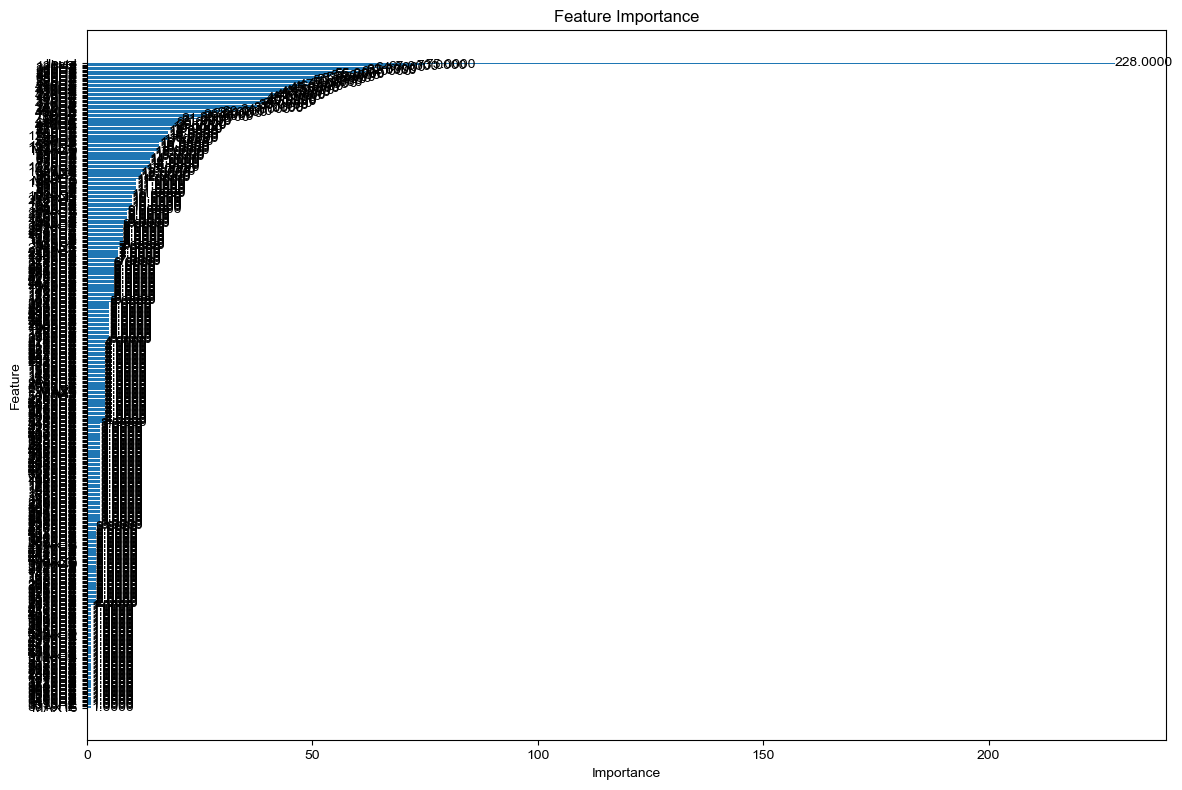

In [65]:
import matplotlib.pyplot as plt

# 폰트를 Arial로 설정
plt.rcParams['font.family'] = 'Arial'

# 피처 중요도 추출
importance = model.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
feature_names = [x[0] for x in sorted_importance]
importance_values = [x[1] for x in sorted_importance]

# 중요도를 가지고 있는 데이터프레임 생성
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_values
})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(12, 8))

bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')

for bar, importance in zip(bars, feature_importance_df['Importance']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f'{importance:.4f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

plt.tight_layout()
plt.show()


In [ ]:
## Feature importance 높은 순으로 feature 30개당 그래프 그리기

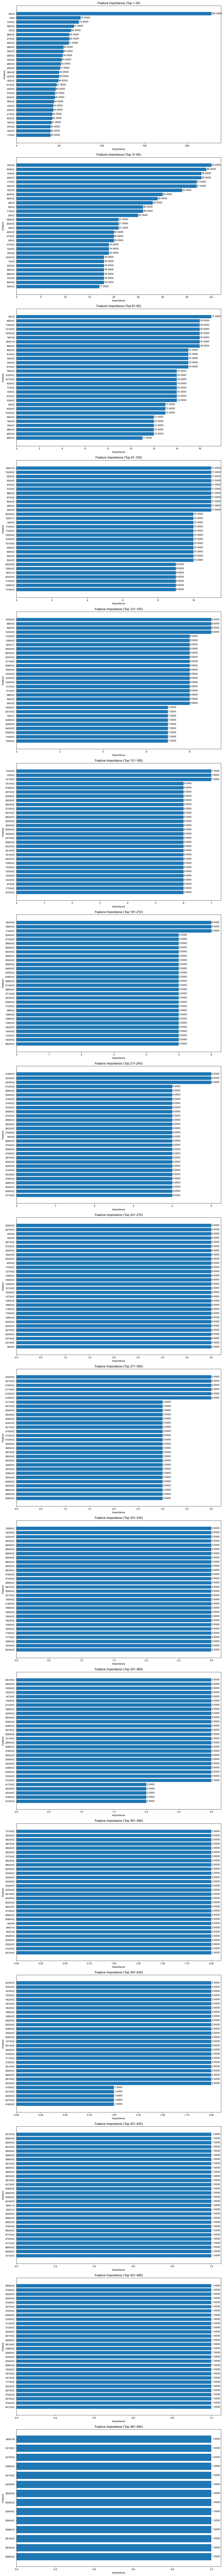

In [66]:
import matplotlib.pyplot as plt

# 피처 중요도 추출
importance = model.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
feature_names = [x[0] for x in sorted_importance]
importance_values = [x[1] for x in sorted_importance]

# 중요도를 가지고 있는 데이터프레임 생성
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_values
})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 피처를 30개씩 나누어 그래프 생성
num_features = len(feature_importance_df)
num_subplots = (num_features // 30) + 1

plt.figure(figsize=(12, 8*num_subplots))

for i in range(num_subplots):
    start_idx = i * 30
    end_idx = min((i + 1) * 30, num_features)
    
    subset_df = feature_importance_df.iloc[start_idx:end_idx]
    subset_df = subset_df.sort_values(by='Importance', ascending=True)  # 중요도가 높은 순으로 정렬
    
    plt.subplot(num_subplots, 1, i+1)
    bars = plt.barh(subset_df['Feature'], subset_df['Importance'], align='center')
    
    for bar, importance in zip(bars, subset_df['Importance']):
        plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f'{importance:.4f}', 
                 va='center', ha='left', fontsize=10, color='black')

    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance (Top {start_idx+1}-{end_idx})')

plt.tight_layout()
plt.show()


Skipping feature lrate because it doesn't contain digits.


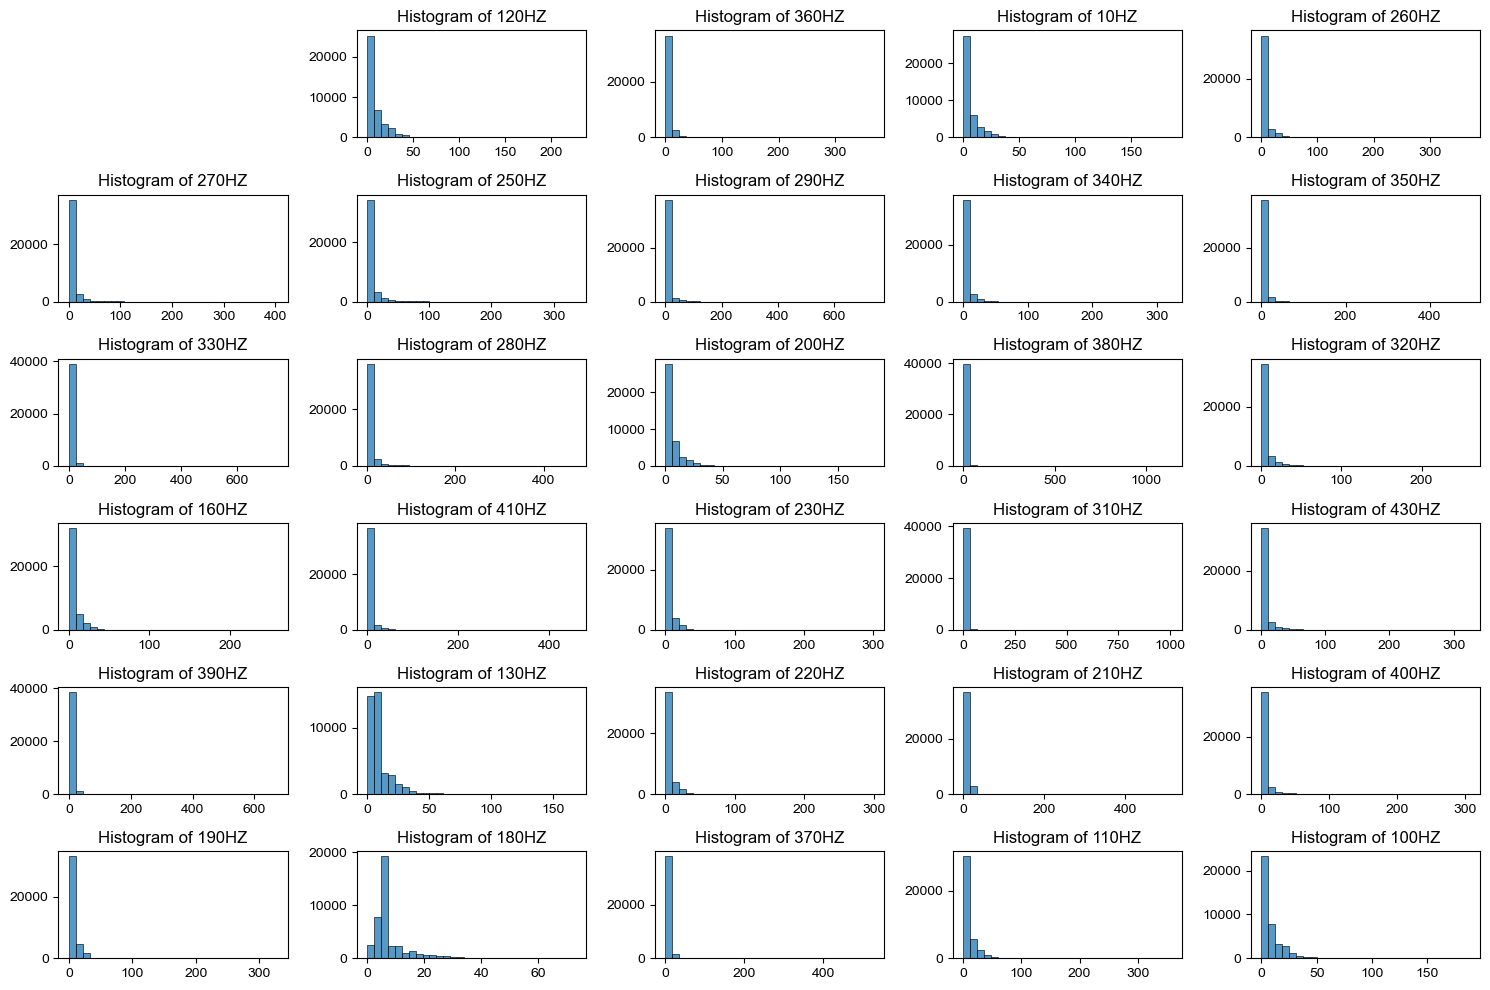

In [68]:
# 'llevel' 변수를 제외하고 상위 30개 피처 선택
top_30_features = feature_importance_df[~feature_importance_df['Feature'].str.contains('llevel')].head(30)['Feature'].values

# 히스토그램 그리기
plt.figure(figsize=(15, 10))

for i, feature in enumerate(top_30_features):
    # 피처 이름에서 숫자 부분 추출
    # 숫자가 없는 경우를 대비하여 예외 처리를 추가합니다.
    try:
        feature_index = int(''.join(filter(str.isdigit, feature)))
    except ValueError:
        print(f"Skipping feature {feature} because it doesn't contain digits.")
        continue
    
    plt.subplot(6, 5, i + 1)
    sns.histplot(x_train.iloc[:, feature_index], kde=False, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


## 모델 재학습

In [74]:
## 상위 53개 변수들
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

# XGBoost 모델 재학습을 위한 상위 변수 선택
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(53)['Feature'].values

print("중요도가 높은 53개 변수들:",top_features)

중요도가 높은 57개 변수들: ['llevel' 'lrate' '120HZ' '360HZ' '10HZ' '260HZ' '270HZ' '250HZ' '290HZ'
 '340HZ' '350HZ' '330HZ' '280HZ' '200HZ' '320HZ' '380HZ' '160HZ' '410HZ'
 '230HZ' '310HZ' '430HZ' '390HZ' '130HZ' '220HZ' '210HZ' '400HZ' '190HZ'
 '110HZ' '100HZ' '370HZ' '180HZ' '420HZ' '140HZ' '240HZ' '170HZ' '300HZ'
 '150HZ' '460HZ' '480HZ' '90HZ' '60HZ' '710HZ' '20HZ' '50HZ' '450HZ'
 '680HZ' '470HZ' '80HZ' '440HZ' '570HZ' '720HZ' '760HZ' '70HZ']


In [75]:
# 상위 변수에 해당하는 데이터만 선택하여 새로운 DMatrix 생성
dtrain_top = xgb.DMatrix(data=x_train[top_features], label=y_train)
dvalid_top = xgb.DMatrix(data=x_valid[top_features], label=y_valid)

# XGBoost 모델 재학습
params = {}

model_top = xgb.train(params, dtrain_top, num_boost_round=100, evals=[(dtrain_top, 'train'), (dvalid_top, 'valid')], early_stopping_rounds=10, verbose_eval=10)

# 재학습된 모델에서 예측 수행
y_pred_train_top = model_top.predict(dtrain_top)
y_pred_valid_top = model_top.predict(dvalid_top)

# 예측값을 클래스로 변환
preds_train_top = np.asarray([np.argmax(line) for line in y_pred_train_top])
preds_valid_top = np.asarray([np.argmax(line) for line in y_pred_valid_top])

# 평가 함수 정의
def get_clf_eval(y_true, y_pred):
    confusion = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print("Confusion Matrix:")
    print(confusion)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# 학습 데이터와 검증 데이터에 대해 평가
print("훈련 데이터 평가:")
get_clf_eval(y_train, preds_train_top)

print("\n검증 데이터 평가:")
get_clf_eval(y_valid, preds_valid_top)


[0]	train-rmse:1.41901	valid-rmse:1.43663
[10]	train-rmse:1.24629	valid-rmse:1.28787
[20]	train-rmse:1.13444	valid-rmse:1.20134
[30]	train-rmse:1.04761	valid-rmse:1.13937
[40]	train-rmse:0.98792	valid-rmse:1.09683
[50]	train-rmse:0.92823	valid-rmse:1.06014
[60]	train-rmse:0.87840	valid-rmse:1.02936
[70]	train-rmse:0.83212	valid-rmse:0.99981
[80]	train-rmse:0.79547	valid-rmse:0.97956
[90]	train-rmse:0.75943	valid-rmse:0.95810
[99]	train-rmse:0.72753	valid-rmse:0.94053
훈련 데이터 평가:
Confusion Matrix:
[[ 8523     0     0     0     0]
 [ 3222     0     0     0     0]
 [12619     0     0     0     0]
 [ 4491     0     0     0     0]
 [11185     0     0     0     0]]
Accuracy: 0.2129, Precision: 0.0453, Recall: 0.2129, F1-score: 0.0747

검증 데이터 평가:
Confusion Matrix:
[[2716    0    0    0    0]
 [ 974    0    0    0    0]
 [3880    0    0    0    0]
 [1392    0    0    0    0]
 [3551    0    0    0    0]]
Accuracy: 0.2171, Precision: 0.0471, Recall: 0.2171, F1-score: 0.0774


C:\Users\leeyh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leeyh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
